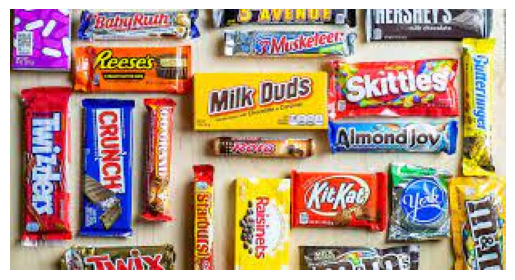

<Figure size 6750x5250 with 0 Axes>

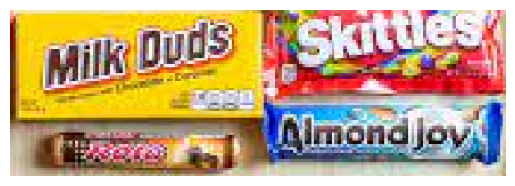

<Figure size 6750x5250 with 0 Axes>

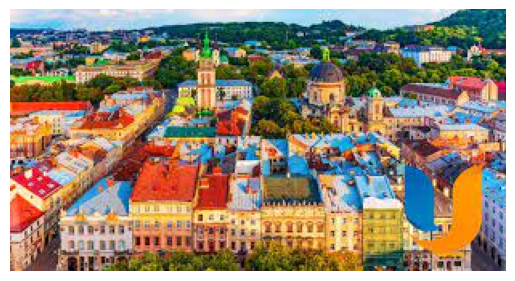

<Figure size 6750x5250 with 0 Axes>

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.figure(figsize=(45, 35), dpi=150)
    plt.show()

def read(path: str):
    return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

img1 = read(r'candy.jpg')
show(img1)

img2 = read(r'candyCrop.jpg')
show(img2)

img3 = read(r'lviv.jpg')
show(img3)

In [51]:
def affine(img):
    img = cv.warpAffine(img, np.array([[1, -0.3, 0], [0, 1, 0]]), img1.shape[:2][::-1])
    return img

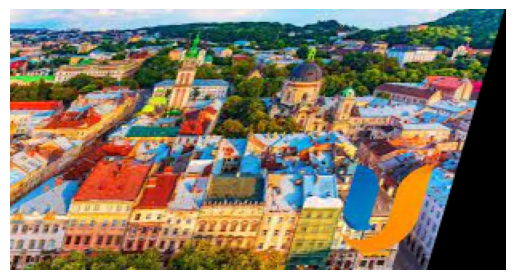

<Figure size 6750x5250 with 0 Axes>

In [52]:
img4 = affine(img3)
show(img4)

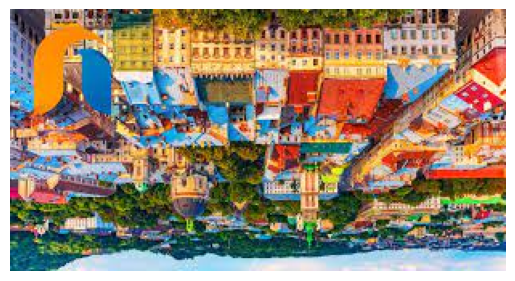

<Figure size 6750x5250 with 0 Axes>

In [53]:
rot_1 = cv.rotate(img3, cv.ROTATE_180)
show(rot_1)

In [54]:
def dist(x, y):
  n = len(x)
  assert len(x) == len(y)
  return float(sum([(x[i] ^ y[i]) for i in range(n)]))

In [55]:
def custom_match(img, second):
    n_dots = 25
    threshold: float = 0.5
    kp1, des1 = cv.akaze.detectAndCompute(img, None)
    kp2, des2 = cv.akaze.detectAndCompute(second, None)
    matches = []
    for i, d1 in enumerate(des1):
        distances = np.linalg.norm(d1-des2, axis=1)
        min_index = np.argmin(distances)
        min_distances = distances[min_index]
        if min_distances < threshold:
            matches.append(cv.DMatch(i, min_index, min_distances))

    matches = sorted(matches, key=lambda x: x.distance)
    imgs = cv.drawMatches(img, kp1, second, kp2, matches[:n_dots], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    show(imgs)

In [56]:
def cv_match(img,second):
    n_dots = 25
    kp1, des1 = cv.akaze.detectAndCompute(img, None)
    kp2, des2 = cv.akaze.detectAndCompute(second, None)

    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    imgs = cv.drawMatches(img, kp1, second, kp2, matches[:n_dots], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    show(imgs)

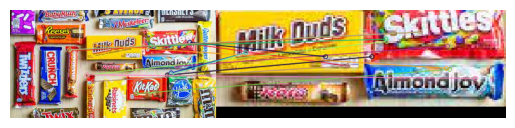

<Figure size 6750x5250 with 0 Axes>

In [57]:
custom_match(img1,img2)

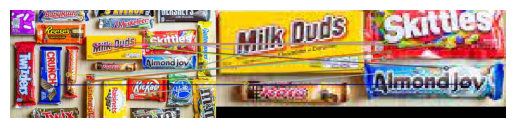

<Figure size 6750x5250 with 0 Axes>

In [58]:
cv_match(img1,img2)

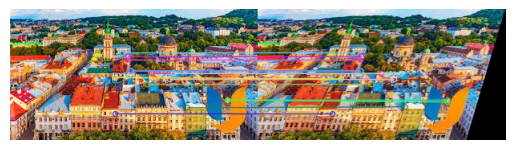

<Figure size 6750x5250 with 0 Axes>

In [59]:
custom_match(img3, img4)

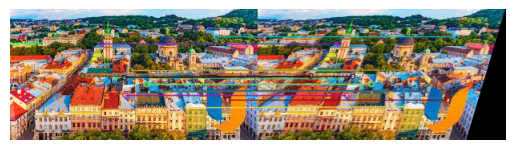

<Figure size 6750x5250 with 0 Axes>

In [60]:
cv_match(img3, img4)

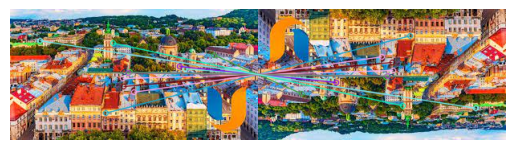

<Figure size 6750x5250 with 0 Axes>

In [61]:
custom_match(img3, rot_1)

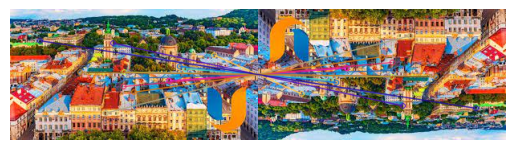

<Figure size 6750x5250 with 0 Axes>

In [62]:
cv_match(img3, rot_1)